<a href="https://colab.research.google.com/github/FGalvao77/Classificador-de-CHURN/blob/main/Classificador_de_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificador de `CHURN`**

---



In [1]:
# biblioteca para ignorar mensagens de alerta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando o conjunto de dados do repositório do meu GitHub
!wget https://raw.githubusercontent.com/FGalvao77/datasets/main/Telco-Customer-Churn.csv

--2022-02-07 22:08:19--  https://raw.githubusercontent.com/FGalvao77/datasets/main/Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘Telco-Customer-Churn.csv’

Telco-Customer-Chur 100%[===================>] 954.59K  --.-KB/s    in 0.06s   

2022-02-07 22:08:19 (16.4 MB/s) - ‘Telco-Customer-Churn.csv’ saved [977501/977501]



In [3]:
# visualizando o diretório principal
%ls

sample_data/  Telco-Customer-Churn.csv


In [4]:
# realizando a leitura do conjunto de dados
!head Telco-Customer-Churn.csv

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,

In [5]:
# importando a biblioteca para manipulação de dados
import pandas as pd

In [6]:
# instanciando o conjunto de dados na variável "data"
data = pd.read_csv('/content/Telco-Customer-Churn.csv')

# visualizando o conjunto de dados
display(
    data.head(),    # visualizando as 5 primeiras observações
    data.tail()     # visualizando as 5 últimas observações
)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# importando as bibliotecas para visualização gráfica
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline
sns.set()

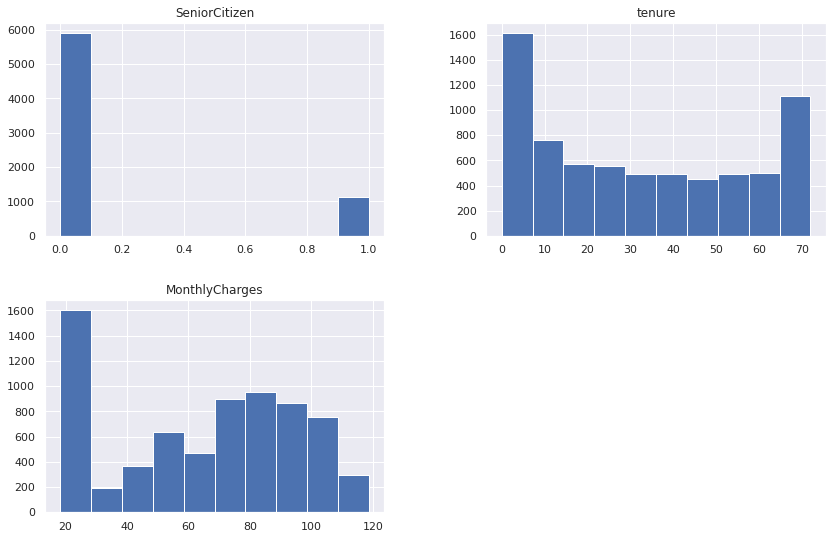

In [9]:
# histograma da distribuição dos dados numéricos
data.hist(figsize=(14,9));

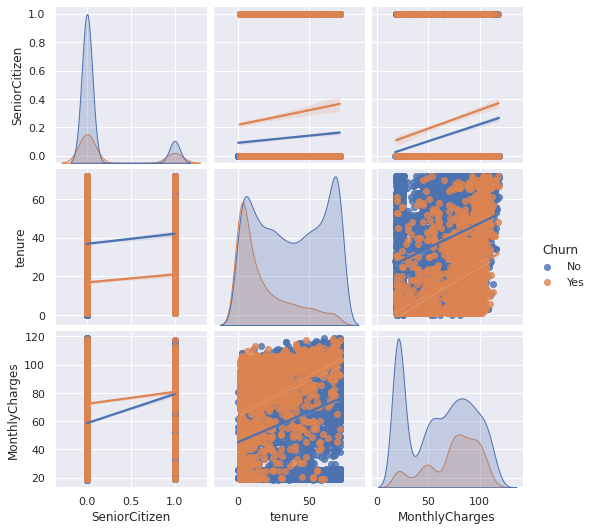

In [10]:
# com a função ".pairplot()" plotando gráfico do tipo regressão das variáveis em relação a variável alvo
# e visualizando as distribuições das instâncias das variáveis
sns.pairplot(data, hue='Churn', kind='reg');

In [11]:
# contabilizando a distribuição das instâncias do atributo alvo
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

> Perceba que, temos um desbalanceamento entre as classes.

In [12]:
# visualizando as 10 primeiras observações da variável alvo
data['Churn'][:10]

0     No
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7     No
8    Yes
9     No
Name: Churn, dtype: object

In [13]:
# visualizando a proporção das instâncias negativa em relação a classe positiva
# data['Churn'].value_counts()[0] / len(data['Churn']) * 100  # classes: 0 - não | 1 - sim
data['Churn'].value_counts()[0] / data.shape[0] * 100   # classes: 0 - não | 1 - sim

73.4630129206304

In [14]:
# visualizando a distribuição (proporção) das instâncias
data['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Agora vamos transformar as instâncias do atributo alvo de categórico para numérico.

In [15]:
# realizando o mapeamento da variável alvo e transformando as instâncias em dado do tipo numérico
data['Churn'] = data['Churn'].map(
    {'No': 0, 'Yes': 1}
)

In [16]:
# visualizando as instâncias únicas presente na variável alvo
data['Churn'].unique()

array([0, 1])

In [17]:
# contabilizando as instâncias da variável alvo após a transformação
print(
    data['Churn'].value_counts(), 
    data['Churn'].value_counts() / data.shape[0] * 100,
    sep='\n\n'
)

0    5174
1    1869
Name: Churn, dtype: int64

0    73.463013
1    26.536987
Name: Churn, dtype: float64


In [18]:
# visualizando o tipo de dado da variável alvo
data['Churn'].dtype

dtype('int64')

In [19]:
# visualizando o tipo de dado dos atributos do conjunto de dados
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [20]:
# visualizando as 10 primeiras observações do atributo "TotalCharges"
data['TotalCharges'][:10]

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [21]:
# tipo de dado do atributo "TotalCharges"
data['TotalCharges'].dtype

dtype('O')

Podemos ver que, são dados numéricos, pórem o seu tipo está definido como `object`. Portanto será necessário, atualizar a definição do tipo de dado do atributo em questão.

In [22]:
# realizando a transformação do tipo da variável do atributo "TotalCharges"
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], 
                                     errors='coerce')

In [23]:
# conferindo se a transformação foi realizada
data['TotalCharges'].dtype

dtype('float64')

In [24]:
# contabilizando se há valores faltantes nos atributos
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> O atributo `TotalCharges` tem valores faltantes!

In [25]:
# contabilizando a porcentagem de dados faltantes do atributo em relação ao total de observações do conjunto de dados
print(f'{round(data.TotalCharges.isna().sum() / data.shape[0] * 100, 2)}' + '%') 

0.16%


> Os valores faltantes representa uma pequena porcentagem em relação ao total de observações do conjunto de dados. E diante disso, iremos elimina-los.

In [26]:
# eliminando os valores faltantes
data = data.dropna()

In [27]:
# iremos utilizar a função ".any()" que retorna uma resposta boleana para verificar se os valores faltantes foram excluidos
data.isna().sum().any() # True: verdadeiro | False: falso

False

> O retorno foi `False`, portanto não há mais valores faltantes no conjunto de dados.

In [28]:
# eliminando o atributo "customerID" do conjunto de dados, já que o mesmo não agrega ao modelo
data = data.drop('customerID', axis=1)

# visualizando as colunas presentes
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
# particionando os dados para modelagem e teste final
data_modeling = data.sample(frac=0.9, random_state=42)
test_data = data.drop(data_modeling.index)

# resetando os índices
data_modeling.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# visualizando a dimensão do particionamento dos dados
print('Dados para modelagem ' + str(data_modeling.shape))
print('Dados para teste: ' + str(test_data.shape))

Dados para modelagem (6329, 20)
Dados para teste: (703, 20)


In [30]:
# instanciando os atributos categóricos do conjunto de dados (data_modeling)
vars_cats = data_modeling.select_dtypes(include='object').columns

# visualizando o resultado da seleção
vars_cats

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [31]:
# instanciando os atributos numéricos do conjunto de dados (data_modeling)
vars_nums = data_modeling.select_dtypes(exclude='object').columns

# visualizando o resultado da seleção
vars_nums

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

> O atributo alvo, nesse caso, o `Churn` foi selecionado e, devemos excluir da seleção.

In [32]:
# excluindo o atributo alvo
vars_nums = vars_nums[:-1]
vars_nums

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [33]:
# importando as funções para tratamento dos atributos
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [34]:
# instanciando os objetos para tratamento dos atributos categóricos e numéricos

# "encoding" das variáveis categóricas (transformando categórias em números)
ohe = OneHotEncoder()

# "scaling" das variáveis numéricas (não precisa para algoritmos de árvores, mas para modelos lineares é importante a transformação)
scaler = StandardScaler()

In [35]:
# importando a função para realizar as transformações dos atributos
from sklearn.compose import ColumnTransformer

In [36]:
# transformando as instâncias dos atributos, separando o tipo de transformação com o tipo de variável
transformer = ColumnTransformer([('cat_cols', ohe, vars_cats), 
                                 ('num_cols', scaler, vars_nums)])

In [37]:
# visualizando o conteúdo do objeto instanciando acima
transformer

ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                ('num_cols', StandardScaler(),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])

In [38]:
# instanciando as variáveis explicativas (X) e resposta (y)
X = data_modeling.drop('Churn', axis=1)     # excluindo o atributo alvo
y = data_modeling['Churn']                  # instanciando o atributo alvo

In [39]:
# contabilizando valores nulos presentes na variável X
X.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [40]:
# visualizando o tipo de dados dos atributos da variável X
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [41]:
# contabilizando valores nulos presentes na variável y
y.isna().sum().any()    # resposta boleana: True | False

False

In [42]:
# visualizando o tipo de dados dos atributos da variável y
y.dtypes

dtype('int64')

In [43]:
# visualziando as 5 primeiras observações da variável explicativa
# X[:5]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,1,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75
1,Female,0,No,No,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85
2,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00
3,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75
4,Female,0,No,No,6,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45


In [44]:
# visualizando as 5 primeiras observações da variável resposta
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [45]:
# visualizando a dimensão dos objetos
X.shape, y.shape    # linhas e colunas

((6329, 19), (6329,))

In [46]:
# importando a função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split  

In [47]:
# particionando o dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [48]:
# visualizando a dimensão dos dados particionados
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4746, 19), (1583, 19), (4746,), (1583,))

Depois de realizarmos as etapas de exploração, limpeza e pré-processamento dos dados, agora iremos realizar o treinamento e avaliação dos modelos.

Iremos utilizar três modelos bases, são eles:
- Decision Tree;
- Random Forest e,
- Logist Regression

Vamos importar as bibliotecas e funções que será utilizados.

In [49]:
from sklearn.tree import DecisionTreeClassifier         # árvore de decisão
from sklearn.ensemble import RandomForestClassifier     # floresta randômica
from sklearn.linear_model import LogisticRegression     # regressão logśtica

from sklearn.pipeline import Pipeline                   # para criação de "pipeline" de modelos             

from sklearn.metrics import (accuracy_score,            # métrica de avaliação do modelo
                             classification_report,     # relatório das métricas
                             confusion_matrix)          # visualização da matriz de confusão

**Decison Tree**

In [50]:
# instanciando o classificador
dectree_model = DecisionTreeClassifier(random_state=42)

In [51]:
# criando o pipeline para transformação dos atributos
pipe_dectree = Pipeline([('preprocessing', transformer),
                 ('classifier', dectree_model)])

In [52]:
# treinando o modelo depois das transformações realizadas
pipe_dectree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num_cols', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [53]:
# realizando as predições com os dados da variável X_val
preds_dectree = pipe_dectree.predict(X_val)

# visualizando as 20 primeiras predições realizadas com o modelo
print('Predição:', preds_dectree[:20])

# visualizando as 20 primeiras classificações reais da variável y_val
print('Real:    ', y_val.values[:20].flatten())

Predição: [0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0]
Real:     [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0]


In [54]:
# visualizando a acurácia do modelo
accuracy_score(y_val, preds_dectree)

0.7176247631080227

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1141
           1       0.49      0.46      0.47       442

    accuracy                           0.72      1583
   macro avg       0.64      0.64      0.64      1583
weighted avg       0.71      0.72      0.71      1583



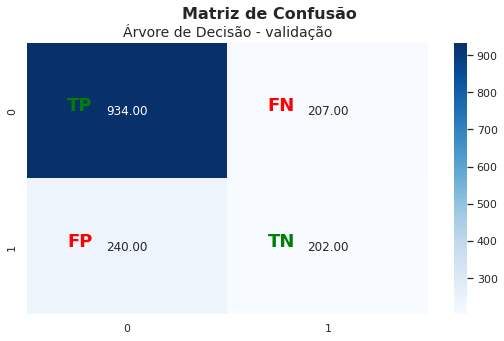

In [55]:
# imprimindo o relatório de classificação dos dados de validação do modelo
print(classification_report(y_val, preds_dectree))

# visualizando graficamente a matriz de confusão dos dados de validação do modelo
fig = plt.figure(figsize=[9, 5])
fig.suptitle('Matriz de Confusão\n', fontsize=16, fontweight='bold')

sns.heatmap(confusion_matrix(y_val, preds_dectree), cmap='Blues', annot=True, fmt='.2f')
plt.title('Árvore de Decisão - validação', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FN', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FP', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

plt.show();

**Random Forest**

In [56]:
# instanciando o classificador
randfor_model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [57]:
# criando o pipeline
pipe_randfor = Pipeline([('preprocessing', transformer),
                 ('classifier', randfor_model)])

In [58]:
# treinando o modelo depois das transformações realizadas
pipe_randfor.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num_cols', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [59]:
# realizando as predições com os dados da variável X_val
preds_randfor = pipe_randfor.predict(X_val)

# visualizando as 20 primeiras predições realizadas com o modelo
print('Predição:', preds_randfor[:20])

# visualizando as 20 primeiras classificações reais da variável y_val
print('Real:    ', y_val.values[:20].flatten())

Predição: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Real:     [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0]


In [60]:
# visualizando a acurácia do modelo
accuracy_score(y_val, preds_randfor)

0.7953253316487682

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1141
           1       0.69      0.49      0.57       442

    accuracy                           0.80      1583
   macro avg       0.75      0.70      0.72      1583
weighted avg       0.78      0.80      0.78      1583



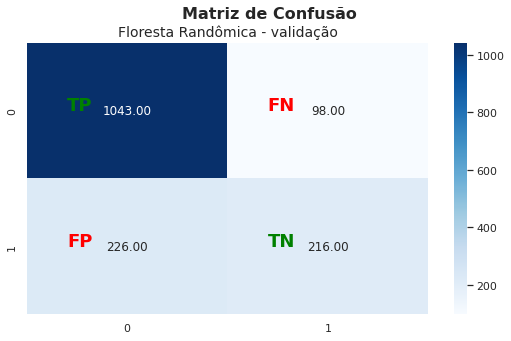

In [61]:
# imprimindo o relatório de classificação dos dados de validação do modelo
print(classification_report(y_val, preds_randfor))

# visualizando graficamente a matriz de confusão dos dados de validação do modelo
fig = plt.figure(figsize=[9, 5])
fig.suptitle('Matriz de Confusão\n', fontsize=16, fontweight='bold')

sns.heatmap(confusion_matrix(y_val, preds_randfor), cmap='Blues', annot=True, fmt='.2f')
plt.title('Floresta Randômica - validação', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FN', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FP', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

plt.show();

**Logist Regression**

In [62]:
# instanciando o classificador
logreg_model = LogisticRegression(random_state=42, n_jobs=-1)

In [63]:
# criando o pipeline
pipe_logreg = Pipeline([('preprocessing', transformer),
                 ('classifier', logreg_model)])

In [64]:
# treinando o modelo depois das transformações realizadas
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_cols', OneHotEncoder(),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                                 ('num_cols', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('classifier', LogisticRegression(n_jobs=-1, random_state=42))])

In [65]:
# realizando as predições com os dados da variável X_val
preds_logreg = pipe_logreg.predict(X_val)

# visualizando as 20 primeiras predições realizadas com o modelo
print('Predição:', preds_logreg[:20])

# visualizando as 20 primeiras classificações reais da variável y_val
print('Real:    ', y_val.values[:20].flatten())

Predição: [0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]
Real:     [0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0]


In [66]:
# visualizando a acurácia do modelo
accuracy_score(y_val, preds_logreg)

0.8054327226784587

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1141
           1       0.69      0.55      0.61       442

    accuracy                           0.81      1583
   macro avg       0.76      0.73      0.74      1583
weighted avg       0.80      0.81      0.80      1583



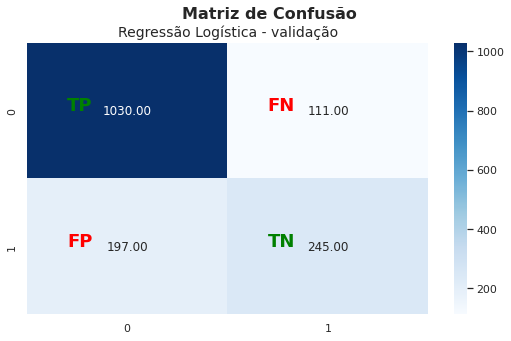

In [67]:
# imprimindo o relatório de classificação dos dados de validação do modelo
print(classification_report(y_val, preds_logreg))

# visualizando graficamente a matriz de confusão dos dados de validação do modelo
fig = plt.figure(figsize=[9, 5])
fig.suptitle('Matriz de Confusão\n', fontsize=16, fontweight='bold')

sns.heatmap(confusion_matrix(y_val, preds_logreg), cmap='Blues', annot=True, fmt='.2f')
plt.title('Regressão Logística - validação', fontsize=14)
plt.xticks()
plt.yticks()

plt.annotate('TP', (0.2,0.5), fontsize=18, fontweight='bold', color='green')
plt.annotate('FN', (1.2,0.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('FP', (0.2,1.5), fontsize=18, fontweight='bold', color='red')
plt.annotate('TN', (1.2,1.5), fontsize=18, fontweight='bold', color='green')

plt.show();

**Explorando outras possibilidades**

In [68]:
# importando biblioteca matemática de alto nível
import numpy as np

# funções para avaliação dos modelos
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                            #  plot_confusion_matrix,     # função depreciada substituida pela "ConfusionMatrixDisplay"
                             ConfusionMatrixDisplay,
                             roc_curve)

# funções para realizar a validação cruzada, curva de aprendizado e particionanmento dos dados
from sklearn.model_selection import (cross_val_score, 
                                    learning_curve,
                                    train_test_split)

# funções dos modelos
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [69]:
# instanciando os classificadores que será utilizados
clfs = {
    'Logistic Regression': LogisticRegression(max_iter=1_500, random_state=42),
    'Light GBM': LGBMClassifier(learning_rate=0.008, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.001, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10),
    'KNN': KNeighborsClassifier(n_neighbors=2),
    'SVM Linear': SVC(kernel='linear', C=0.025, random_state=42),
    'SVM com Kernel RBF': SVC(gamma=2, C=1, probability=True, random_state=42),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=3),
    'Random Forest': RandomForestClassifier(n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10, min_samples_leaf=3),
    'Rede Neural': MLPClassifier(alpha=1, max_iter=1_500, random_state=42),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}

In [70]:
# convertendo as variáveis categóricas para variáveis numéricas
for col in data_modeling.select_dtypes(include='object').columns:
    data_modeling[col] = data_modeling[col].astype('category')

    # imprimindo o mapeamento
    print(col, '\t', dict(enumerate(data_modeling[col].cat.categories)), end='\n\n')

    data_modeling[col] = data_modeling[col].cat.codes

gender 	 {0: 'Female', 1: 'Male'}

Partner 	 {0: 'No', 1: 'Yes'}

Dependents 	 {0: 'No', 1: 'Yes'}

PhoneService 	 {0: 'No', 1: 'Yes'}

MultipleLines 	 {0: 'No', 1: 'No phone service', 2: 'Yes'}

InternetService 	 {0: 'DSL', 1: 'Fiber optic', 2: 'No'}

OnlineSecurity 	 {0: 'No', 1: 'No internet service', 2: 'Yes'}

OnlineBackup 	 {0: 'No', 1: 'No internet service', 2: 'Yes'}

DeviceProtection 	 {0: 'No', 1: 'No internet service', 2: 'Yes'}

TechSupport 	 {0: 'No', 1: 'No internet service', 2: 'Yes'}

StreamingTV 	 {0: 'No', 1: 'No internet service', 2: 'Yes'}

StreamingMovies 	 {0: 'No', 1: 'No internet service', 2: 'Yes'}

Contract 	 {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}

PaperlessBilling 	 {0: 'No', 1: 'Yes'}

PaymentMethod 	 {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}



In [71]:
# instanciando as variáveis explicativas (X) e resposta (y)
X = data_modeling.drop('Churn', axis=1)
y = data_modeling['Churn']

In [72]:
# particionando o dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [73]:
# importando biblioteca para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="ticks", palette="pastel")

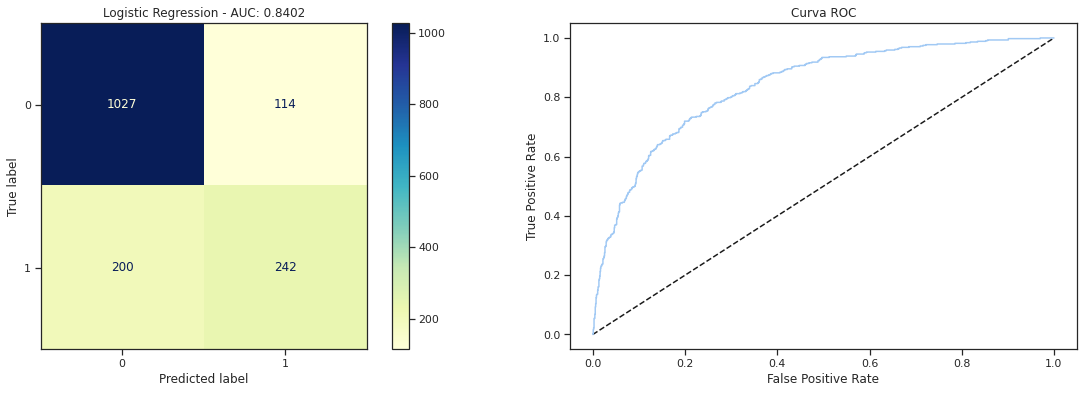

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1141
           1       0.68      0.55      0.61       442

    accuracy                           0.80      1583
   macro avg       0.76      0.72      0.74      1583
weighted avg       0.79      0.80      0.79      1583

----------------------------------------------------------------------------------------------------------------------------------



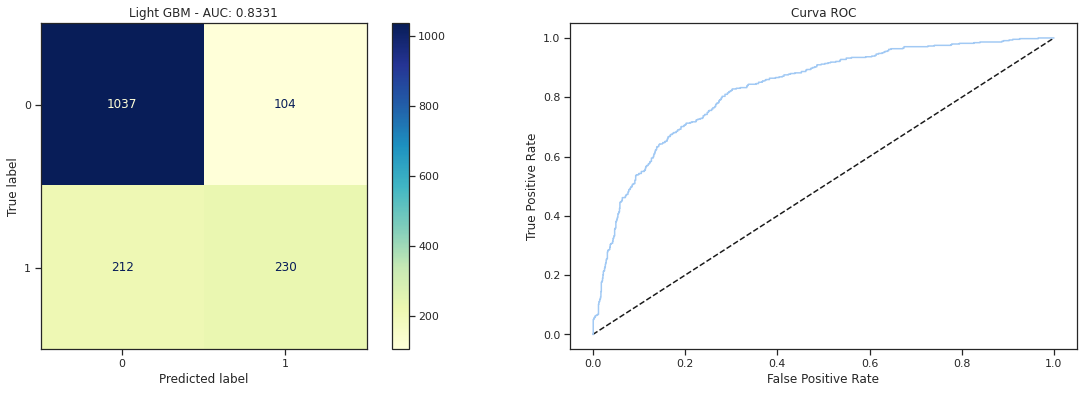

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1141
           1       0.69      0.52      0.59       442

    accuracy                           0.80      1583
   macro avg       0.76      0.71      0.73      1583
weighted avg       0.79      0.80      0.79      1583

----------------------------------------------------------------------------------------------------------------------------------



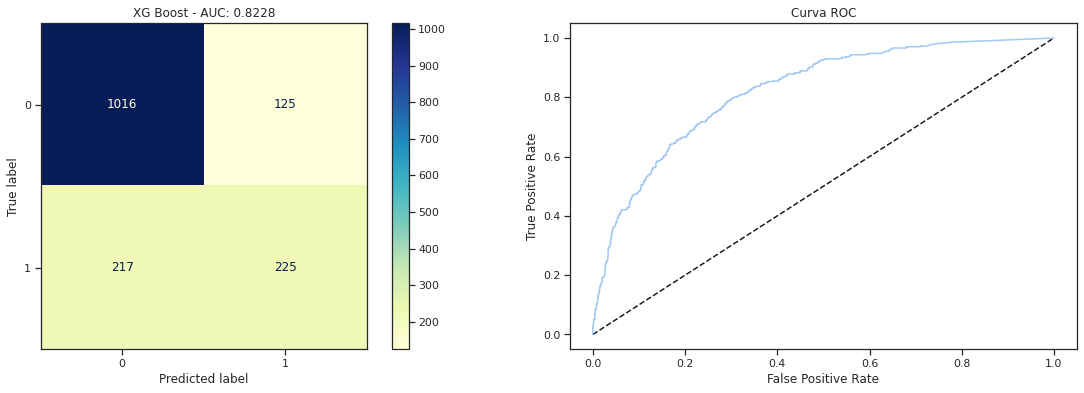

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1141
           1       0.64      0.51      0.57       442

    accuracy                           0.78      1583
   macro avg       0.73      0.70      0.71      1583
weighted avg       0.77      0.78      0.78      1583

----------------------------------------------------------------------------------------------------------------------------------



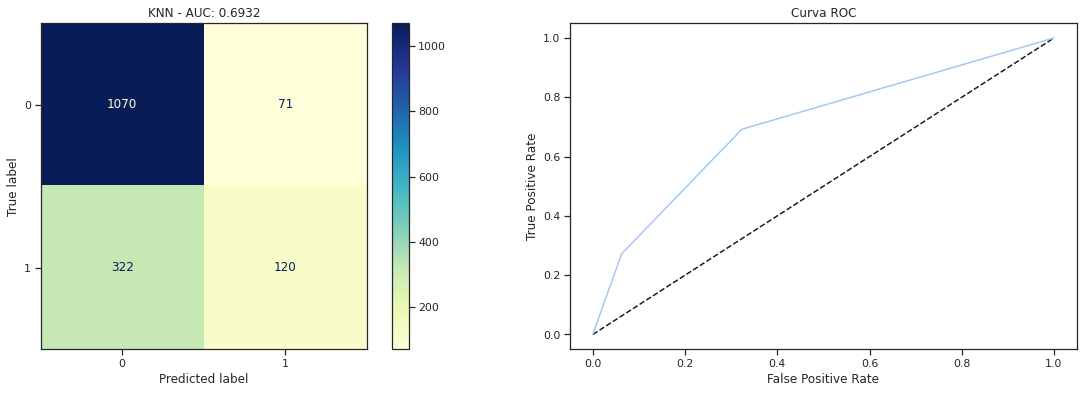

              precision    recall  f1-score   support

           0       0.77      0.94      0.84      1141
           1       0.63      0.27      0.38       442

    accuracy                           0.75      1583
   macro avg       0.70      0.60      0.61      1583
weighted avg       0.73      0.75      0.71      1583

----------------------------------------------------------------------------------------------------------------------------------



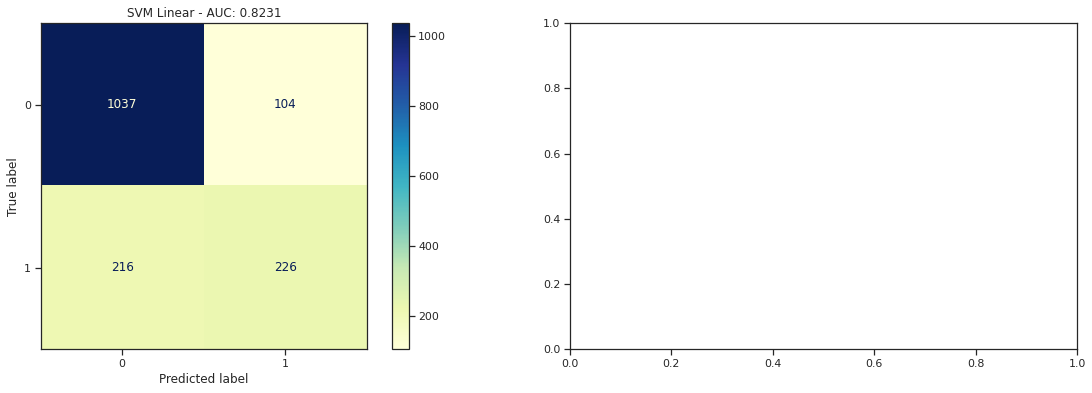

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1141
           1       0.68      0.51      0.59       442

    accuracy                           0.80      1583
   macro avg       0.76      0.71      0.73      1583
weighted avg       0.79      0.80      0.79      1583

----------------------------------------------------------------------------------------------------------------------------------



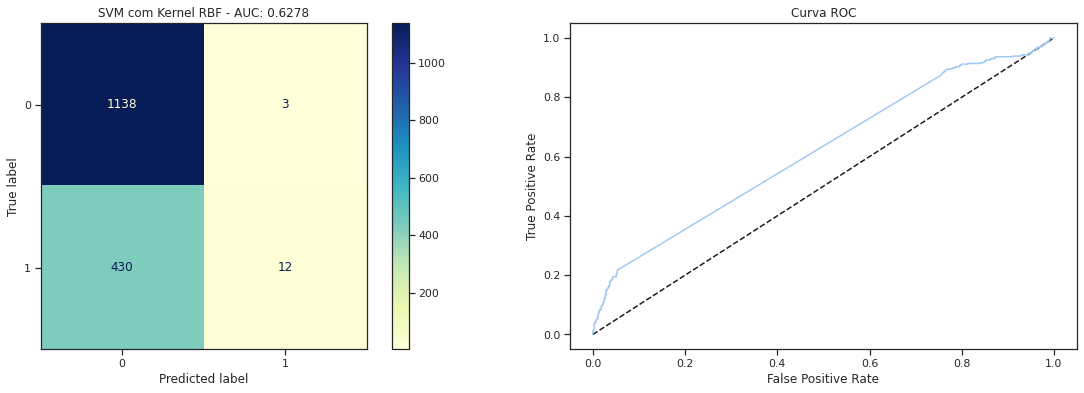

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1141
           1       0.80      0.03      0.05       442

    accuracy                           0.73      1583
   macro avg       0.76      0.51      0.45      1583
weighted avg       0.75      0.73      0.62      1583

----------------------------------------------------------------------------------------------------------------------------------



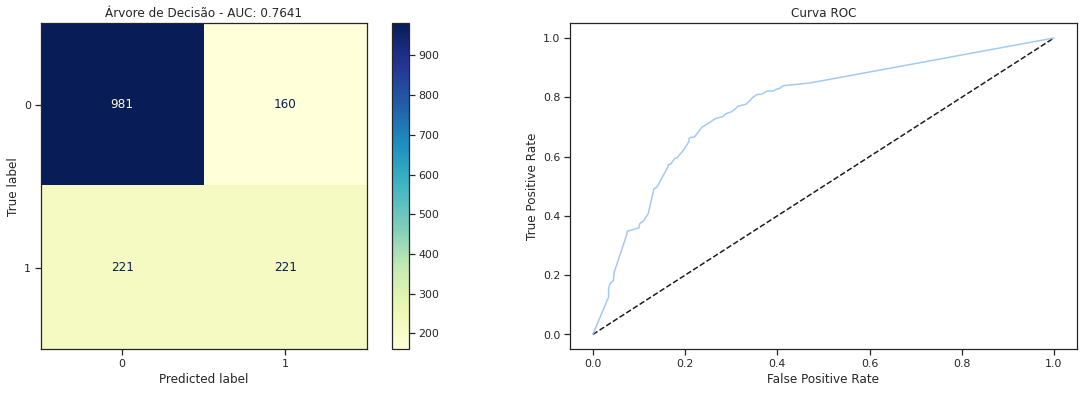

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1141
           1       0.58      0.50      0.54       442

    accuracy                           0.76      1583
   macro avg       0.70      0.68      0.69      1583
weighted avg       0.75      0.76      0.75      1583

----------------------------------------------------------------------------------------------------------------------------------



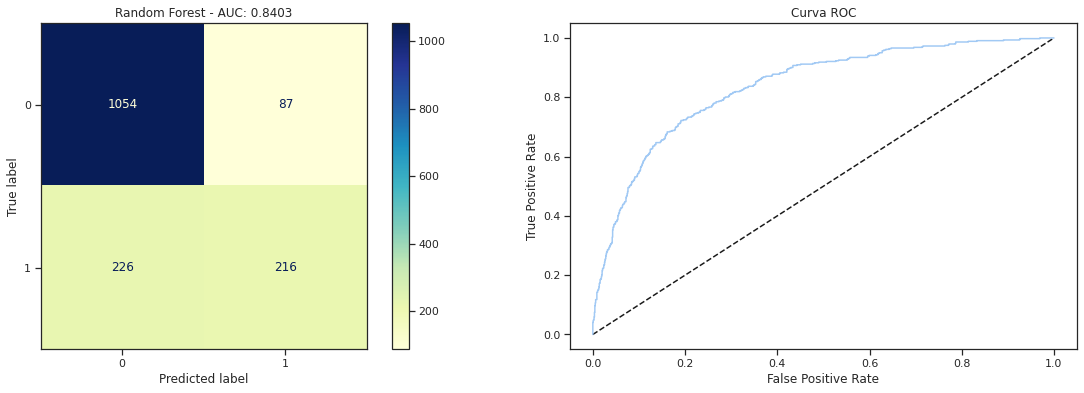

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1141
           1       0.71      0.49      0.58       442

    accuracy                           0.80      1583
   macro avg       0.77      0.71      0.73      1583
weighted avg       0.79      0.80      0.79      1583

----------------------------------------------------------------------------------------------------------------------------------



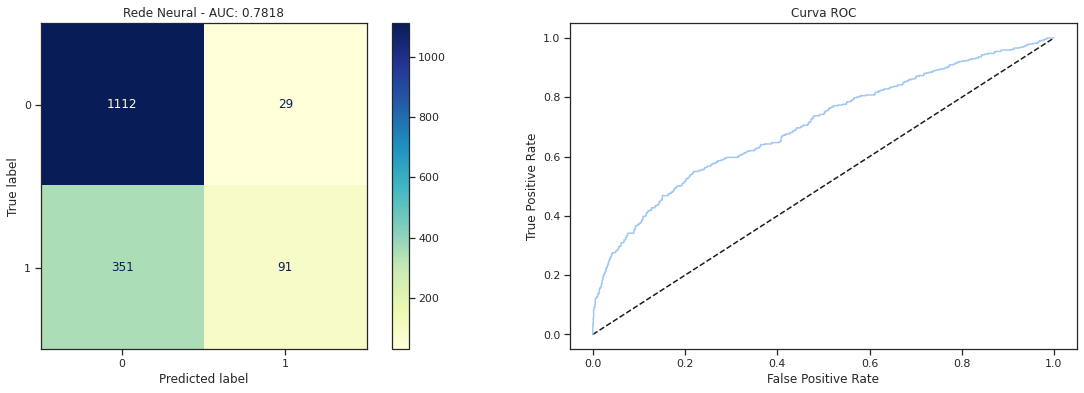

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1141
           1       0.76      0.21      0.32       442

    accuracy                           0.76      1583
   macro avg       0.76      0.59      0.59      1583
weighted avg       0.76      0.76      0.71      1583

----------------------------------------------------------------------------------------------------------------------------------



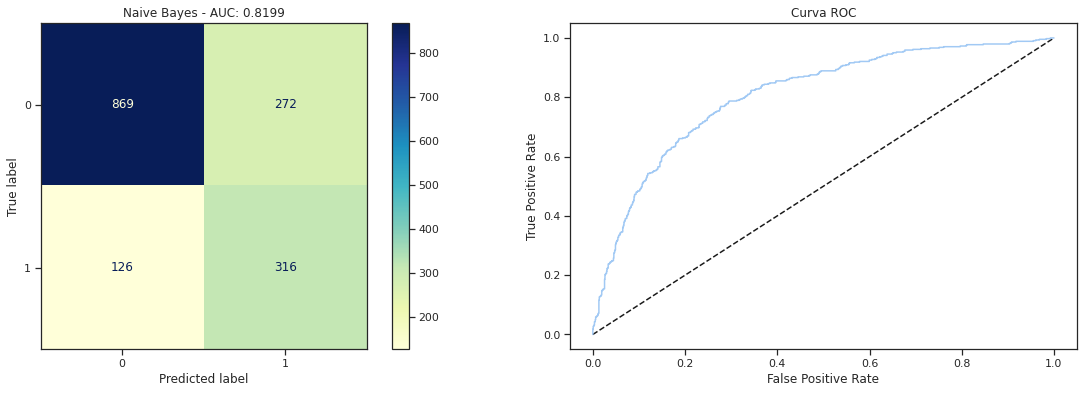

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1141
           1       0.54      0.71      0.61       442

    accuracy                           0.75      1583
   macro avg       0.71      0.74      0.71      1583
weighted avg       0.78      0.75      0.76      1583

----------------------------------------------------------------------------------------------------------------------------------



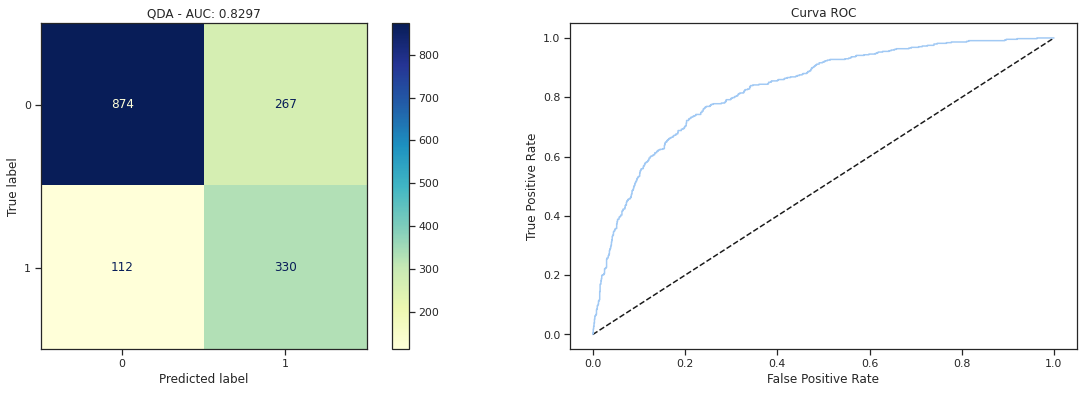

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1141
           1       0.55      0.75      0.64       442

    accuracy                           0.76      1583
   macro avg       0.72      0.76      0.73      1583
weighted avg       0.79      0.76      0.77      1583

----------------------------------------------------------------------------------------------------------------------------------



In [74]:
# treinando os classificadores
for name, clf in clfs.items():

    # treinando o modelo
    clf.fit(X_train, y_train)

    # calculando a métrica AUC
    cv_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
  
    auc = np.mean(cv_auc).round(4)
  
    # realizando as previsões com o modelo
    y_pred = clf.predict(X_val)

    # plotando a matriz de confusão
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
    # plot_confusion_matrix(clf, X_val, y_val, ax=ax1, cmap='Blues')
    ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax1, cmap='YlGnBu')
    ax1.set_title(f'{name} - AUC: {auc}')

    # plotando a curva quando algoritmo cálcula as probabilidades
    if hasattr(clf, 'predict_proba'):

        # previsões de probabilidades para cada classe
        y_pred_prob = clf.predict_proba(X_val)[:, 1]

        # gerando os dados para curva ROC
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    
        # plotando a curva ROC
        ax2.plot([0, 1], [0, 1], 'k--')
        ax2.plot(fpr, tpr)
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title(f'Curva ROC')
        
    # apresenta o plot
    plt.show()

    # imprimindo todas as métricas do modelo
    print(classification_report(y_val, y_pred), end='\n')
    print('-'*130, end='\n\n')

**Vou realizar um balanceamento dos dados da variável alvo**

In [85]:
# importando a biblioteca
import imblearn

In [86]:
# importando a função
from imblearn.over_sampling import SMOTE

In [87]:
# seed (semente aleatória) para reproduzir o mesmo resultado
seed = 42

In [88]:
# quantidade de atributos e seus respectivos nomes
len(data_modeling.columns), data_modeling.columns

(20, Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'))

In [89]:
# instanciando as variáveis explicativas e a variável resposta
X, y = data_modeling.values[:, :19], data_modeling.values[:, 19]

In [147]:
# visualizando 5 observações das variáveis explicativas
X[:5]

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 6.10000e+01,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 2.50000e+01, 1.50175e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.90000e+01,
        1.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.47000e+01, 4.65850e+02],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.30000e+01,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 1.02250e+02, 1.35900e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 3.70000e+01,
        1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.0000

In [148]:
# visualizando 5 observações da variável resposta
y[:5]

array([0., 0., 1., 0., 0.])

In [92]:
# instanciando o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

In [93]:
# aplicando o balanceamento
X_res, y_res = smote_bal.fit_resample(X, y)

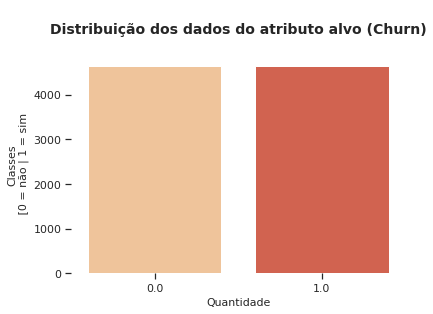

In [96]:
# plotando gráfico da dsitribuição das observações na variável alvo após o seu balanceamento 
sns.countplot(x=y_res, palette = 'OrRd')
plt.box(False)

plt.xlabel('Quantidade', fontsize = 11)
plt.ylabel('Classes\n [0 = não | 1 = sim', fontsize = 11)

plt.title('\nDistribuição dos dados do atributo alvo (Churn)\n', 
          {'fontsize': 14, 'fontweight': 'bold'})
plt.show();


In [97]:
# contabilizando a quantidade de observações nas variáveis após seu balanceamento
len(X_res), len(y_res)

(9276, 9276)

In [98]:
# realizando o particionamento dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, train_size=0.7, random_state=42)

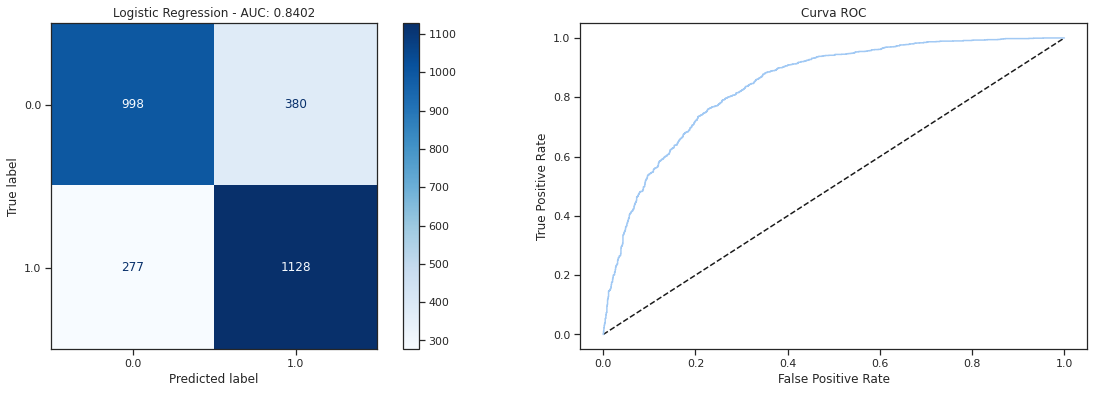

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1378
         1.0       0.75      0.80      0.77      1405

    accuracy                           0.76      2783
   macro avg       0.77      0.76      0.76      2783
weighted avg       0.77      0.76      0.76      2783

----------------------------------------------------------------------------------------------------------------------------------



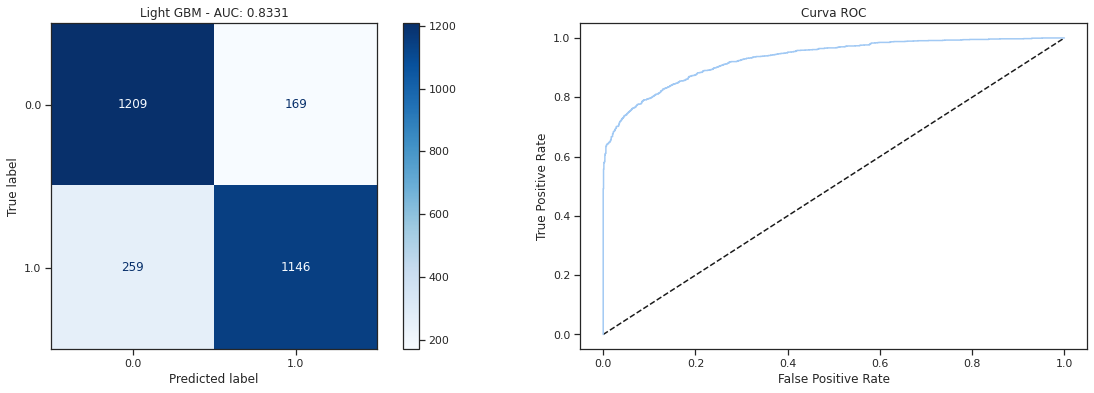

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1378
         1.0       0.87      0.82      0.84      1405

    accuracy                           0.85      2783
   macro avg       0.85      0.85      0.85      2783
weighted avg       0.85      0.85      0.85      2783

----------------------------------------------------------------------------------------------------------------------------------



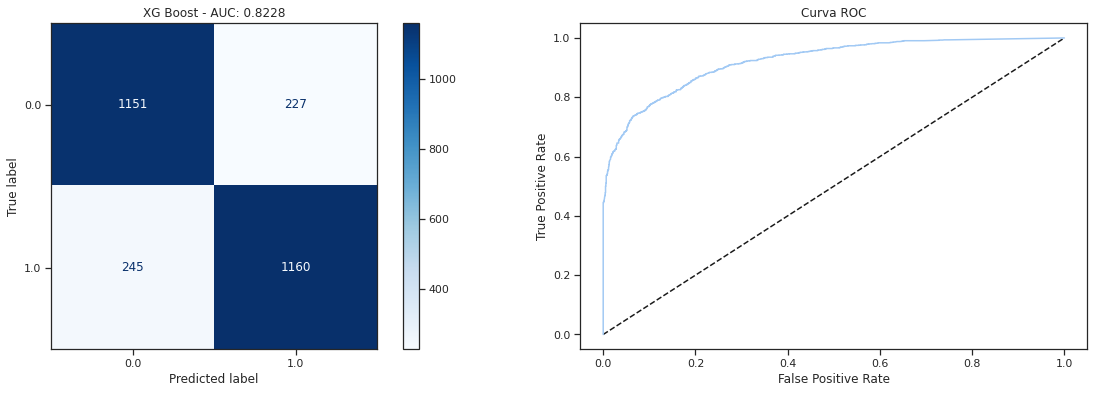

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1378
         1.0       0.84      0.83      0.83      1405

    accuracy                           0.83      2783
   macro avg       0.83      0.83      0.83      2783
weighted avg       0.83      0.83      0.83      2783

----------------------------------------------------------------------------------------------------------------------------------



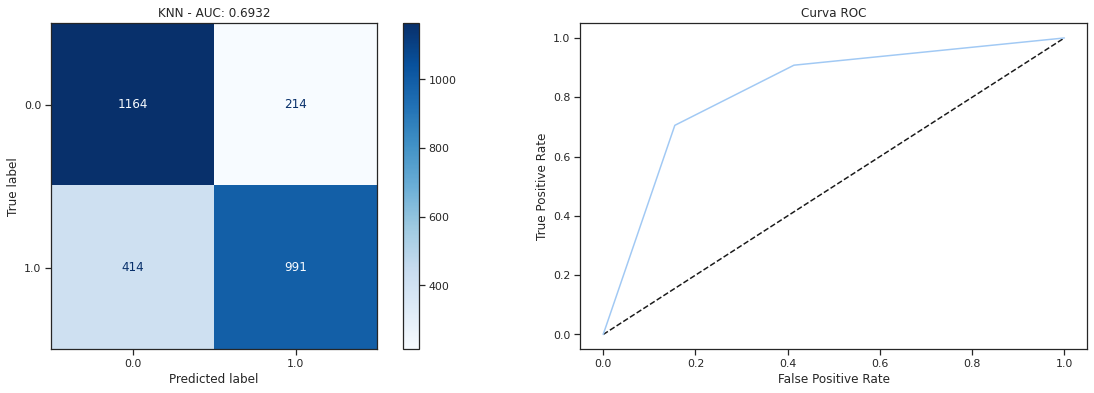

              precision    recall  f1-score   support

         0.0       0.74      0.84      0.79      1378
         1.0       0.82      0.71      0.76      1405

    accuracy                           0.77      2783
   macro avg       0.78      0.78      0.77      2783
weighted avg       0.78      0.77      0.77      2783

----------------------------------------------------------------------------------------------------------------------------------



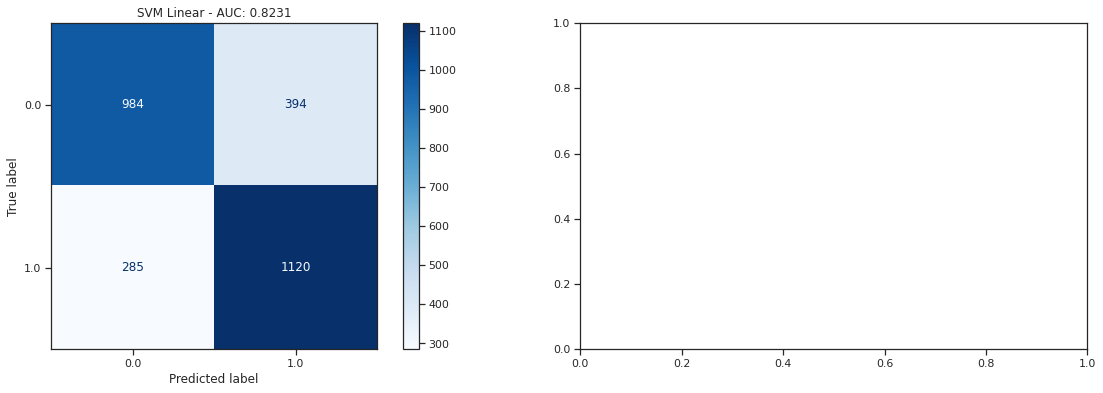

              precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      1378
         1.0       0.74      0.80      0.77      1405

    accuracy                           0.76      2783
   macro avg       0.76      0.76      0.76      2783
weighted avg       0.76      0.76      0.76      2783

----------------------------------------------------------------------------------------------------------------------------------



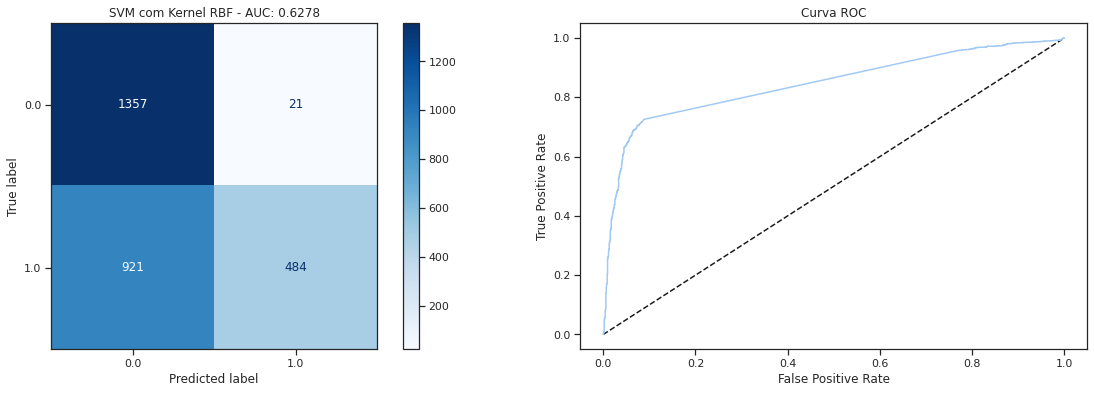

              precision    recall  f1-score   support

         0.0       0.60      0.98      0.74      1378
         1.0       0.96      0.34      0.51      1405

    accuracy                           0.66      2783
   macro avg       0.78      0.66      0.62      2783
weighted avg       0.78      0.66      0.62      2783

----------------------------------------------------------------------------------------------------------------------------------



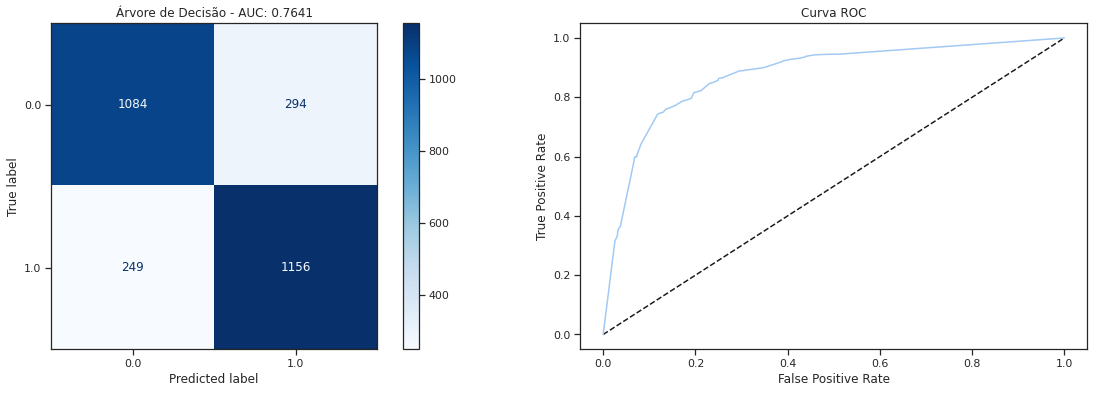

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      1378
         1.0       0.80      0.82      0.81      1405

    accuracy                           0.80      2783
   macro avg       0.81      0.80      0.80      2783
weighted avg       0.81      0.80      0.80      2783

----------------------------------------------------------------------------------------------------------------------------------



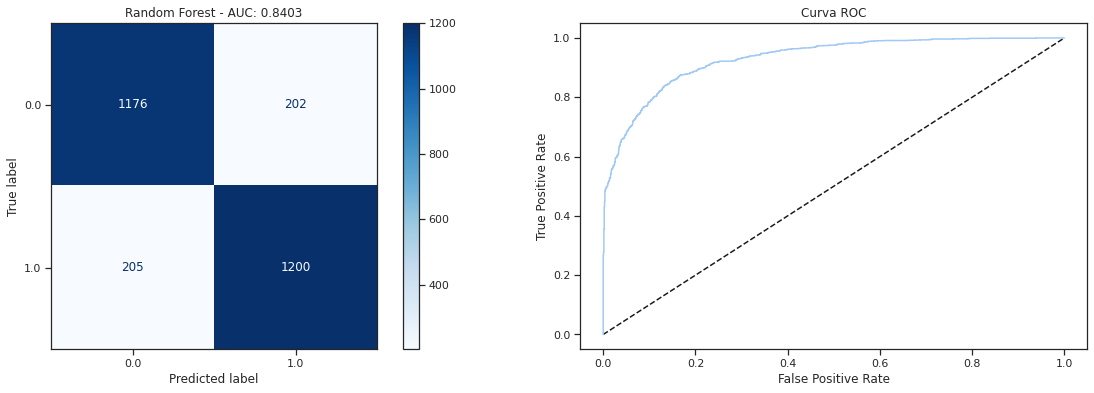

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1378
         1.0       0.86      0.85      0.86      1405

    accuracy                           0.85      2783
   macro avg       0.85      0.85      0.85      2783
weighted avg       0.85      0.85      0.85      2783

----------------------------------------------------------------------------------------------------------------------------------



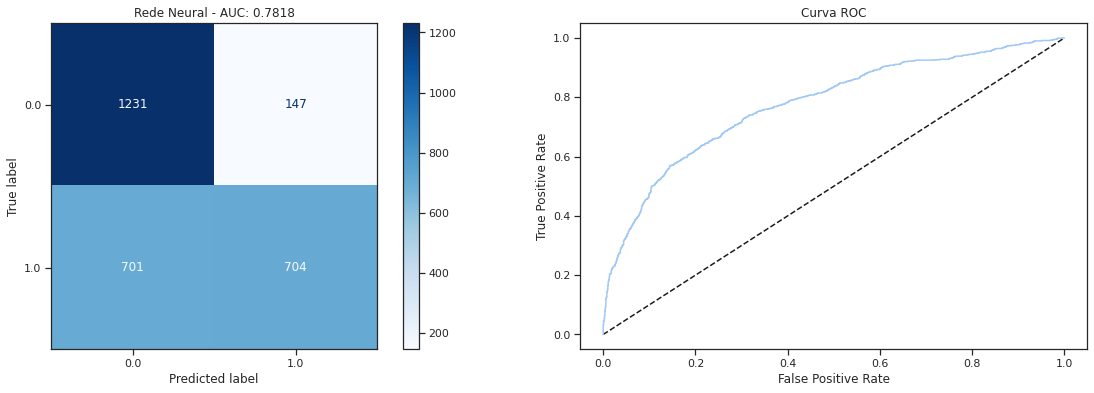

              precision    recall  f1-score   support

         0.0       0.64      0.89      0.74      1378
         1.0       0.83      0.50      0.62      1405

    accuracy                           0.70      2783
   macro avg       0.73      0.70      0.68      2783
weighted avg       0.73      0.70      0.68      2783

----------------------------------------------------------------------------------------------------------------------------------



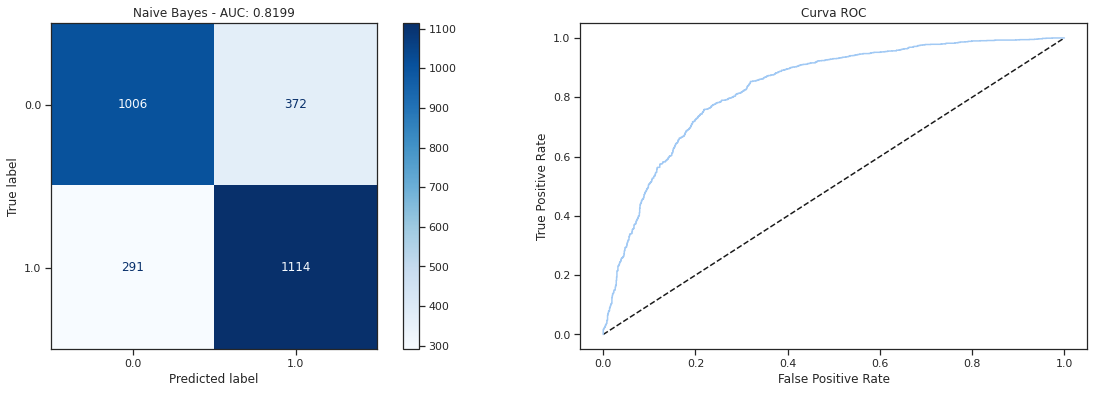

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75      1378
         1.0       0.75      0.79      0.77      1405

    accuracy                           0.76      2783
   macro avg       0.76      0.76      0.76      2783
weighted avg       0.76      0.76      0.76      2783

----------------------------------------------------------------------------------------------------------------------------------



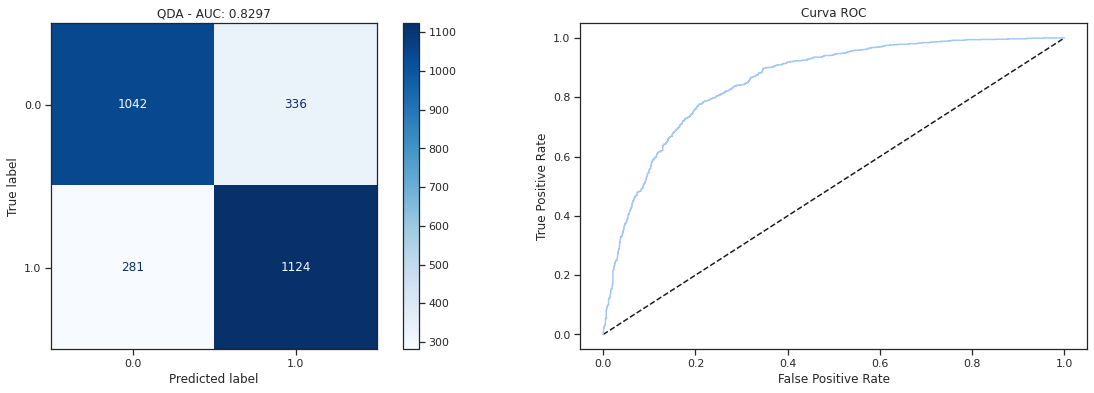

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77      1378
         1.0       0.77      0.80      0.78      1405

    accuracy                           0.78      2783
   macro avg       0.78      0.78      0.78      2783
weighted avg       0.78      0.78      0.78      2783

----------------------------------------------------------------------------------------------------------------------------------



In [99]:
# treinando os classificadores
for name, clf in clfs.items():

    # treinando o modelo
    clf.fit(X_train, y_train)

    # calculando a métrica AUC
    cv_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
  
    auc = np.mean(cv_auc).round(4)
  
    # realizando as previsões com o modelo
    y_pred = clf.predict(X_val)

    # plotando a matriz de confusão
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
    # plot_confusion_matrix(clf, X_val, y_val, ax=ax1, cmap='Blues')
    ConfusionMatrixDisplay.from_estimator(clf, X_val, y_val, ax=ax1, cmap='Blues')
    ax1.set_title(f'{name} - AUC: {auc}')

    # plotando a curva quando algoritmo cálcula as probabilidades
    if hasattr(clf, 'predict_proba'):

        # previsões de probabilidades para cada classe
        y_pred_prob = clf.predict_proba(X_val)[:, 1]

        # gerando os dados para curva ROC
        fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    
        # plotando a curva ROC
        ax2.plot([0, 1], [0, 1], 'k--')
        ax2.plot(fpr, tpr)
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title(f'Curva ROC')

    # apresenta o plot
    plt.show()

    # imprime todas as métricas do modelo
    print(classification_report(y_val, y_pred), end='\n')
    print('-'*130, end='\n\n')

In [100]:
# selecionando os 3 modelos mais promissores

# Logist Regression
logReg = LogisticRegression(max_iter=1_500, random_state=42)
model_logReg = logReg.fit(X_train, y_train)

# Light GBM
lightGBM = LGBMClassifier(learning_rate=0.008, n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10)
model_lightGBM = lightGBM.fit(X_train, y_train)

# Random Forest
randFor = RandomForestClassifier(n_estimators=1_500, n_jobs=-1, random_state=42, max_depth=10, min_samples_leaf=3)
model_randFor = randFor.fit(X_train, y_train)

In [101]:
# função para plotar curva de aprendizado
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(figsize=(15, 8))

    axes.set_title(title)

    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel('Nº de registros')
    axes.set_ylabel('Acurácia')

    # obtençãp dos dados
    train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # plotagem da curva
    axes.grid()

    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                      train_scores_mean + train_scores_std, alpha=0.1, color='r')
  
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                  test_scores_mean + test_scores_std, alpha=0.1, color='g')
  
    axes.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Dados de treino')
  
    axes.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Dados de teste com validação cruzada')
  
    axes.legend(loc='best')

    return plt

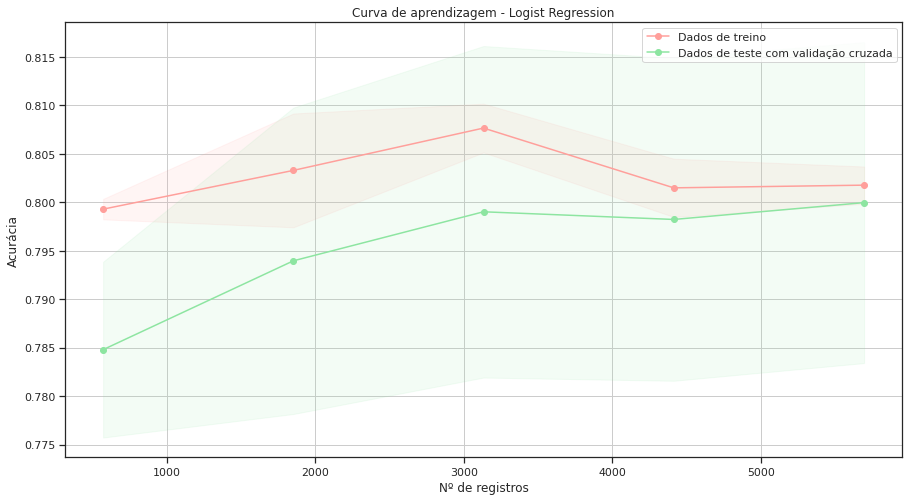

In [102]:
# plotando a curva de aprendizado do modelo "Logist Regression"
plot_learning_curve(model_logReg, title='Curva de aprendizagem - Logist Regression', 
                    X=X, y=y, cv=10, n_jobs=-1)
                     
plt.show()

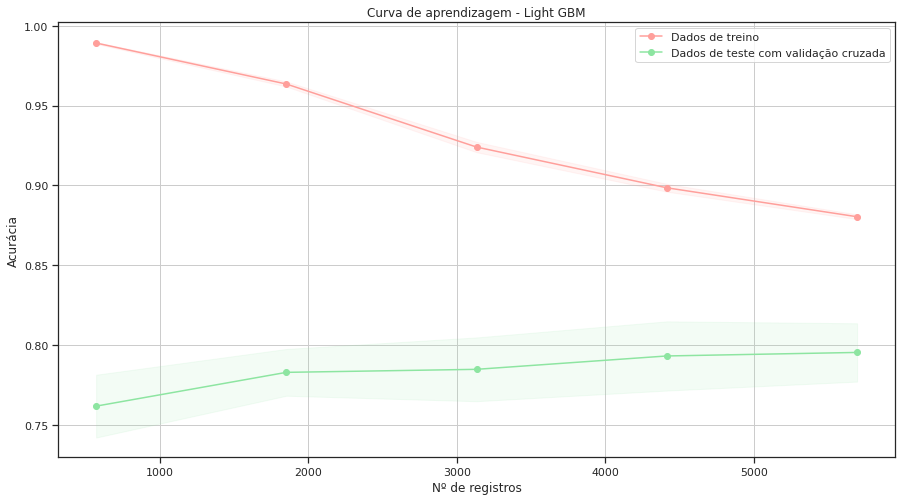

In [103]:
# plotando a curva de aprendizado do modelo "Light GBM"
plot_learning_curve(model_lightGBM, title='Curva de aprendizagem - Light GBM', 
                    X=X, y=y, cv=10, n_jobs=-1)
                     
plt.show()

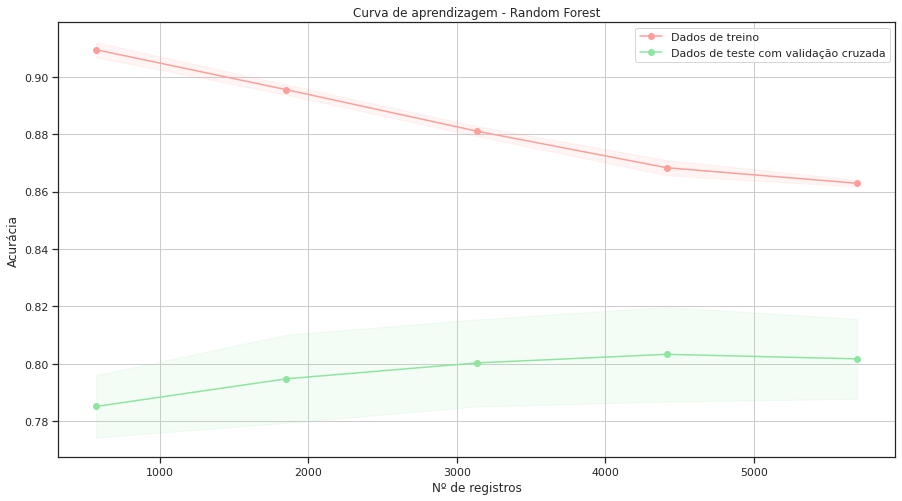

In [104]:
# plotando a curva de aprendizado do modelo "Random Forest"
plot_learning_curve(model_randFor, title='Curva de aprendizagem - Random Forest', 
                    X=X, y=y, cv=10, n_jobs=-1)
                     
plt.show()

In [105]:
# biblioteca para salvar serializado o modelo
import joblib as jl

In [106]:
# instanciando o modelo no objeto "model_logReg_churn.pkl"
jl.dump(model_logReg, 'model_logReg_churn.pkl')

['model_logReg_churn.pkl']

In [107]:
# visualizando o diretório principal
%ls

model_logReg_churn.pkl  sample_data/  Telco-Customer-Churn.csv


In [108]:
# instanciando o modelo no objeto "classifier_final"
classifier_final = jl.load('model_logReg_churn.pkl')
classifier_final   # visualizando o modelo

LogisticRegression(max_iter=1500, random_state=42)

In [142]:
# sorteando um dado aleatório do "data_test"
test = test_data.sample(1)
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
681,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,101.35,780.5,1


In [143]:
# convertendo as variáveis categóricas para variáveis numéricas
for col in test.select_dtypes(include='object').columns:
    test[col] = test[col].astype('category')

    # imprimindo o mapeamento
    print(col, '\t', dict(enumerate(test[col].cat.categories)), end='\n\n')

    test[col] = test[col].cat.codes

gender 	 {0: 'Female'}

Partner 	 {0: 'No'}

Dependents 	 {0: 'No'}

PhoneService 	 {0: 'Yes'}

MultipleLines 	 {0: 'Yes'}

InternetService 	 {0: 'Fiber optic'}

OnlineSecurity 	 {0: 'No'}

OnlineBackup 	 {0: 'No'}

DeviceProtection 	 {0: 'Yes'}

TechSupport 	 {0: 'No'}

StreamingTV 	 {0: 'Yes'}

StreamingMovies 	 {0: 'Yes'}

Contract 	 {0: 'Month-to-month'}

PaperlessBilling 	 {0: 'No'}

PaymentMethod 	 {0: 'Electronic check'}



In [144]:
# excluindo o dado da variável "Churn" e transformando os dados em um vetor (array)
test = test.drop('Churn', axis=1).values
test

array([[  0.  ,   1.  ,   0.  ,   0.  ,   8.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 101.35, 780.5 ]])

In [145]:
# realizando a predição com o modelo
classifier_final.predict(test)

array([1.])

In [122]:
# verificando as versões utilizadas
print('Versões utilizadas')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
# print(f'Sklearn: {sklearn.__version__}')
# print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Imblearn: {imblearn.__version__}')

Versões utilizadas
Numpy: 1.19.5
Pandas: 1.3.5
Seaborn: 0.11.2
Imblearn: 0.8.1
